#Trabajo Práctico N1 Redes Neuronales II
El objetivo de las actividades propuestas es desarrollar intuición sobre la estructura semántica subyacente en embeddings de documentos y palabras básicos generados a partir de conteos y hacer un análisis exploratorio de forma cualitativa. Para ello se trabajará con el dataset 20 Newsgroups (disponible a través de sklearn) y diferentes formas de construir embeddings de documentos y de palabras:

1- Usar las vectorizaciones disponibles en sklearn de CountVectorizer y TfidfVectorizer para construir la matriz de documento-término. Esto proveerá de embeddings para cada documento. Con esta vectorización explorar similaridad entre documentos (tomar algún documento y evaluar los documentos correspondientes con mayor similaridad), dado que el dataset provee también clasificación anotada en tópicos se aprovechar esta clasificación como elemento extra para comprobar la similaridad de documentos. Explorar vectorizar con diferentes cantidades de n-gramas. Toda exploración adicional a las mencionadas es bienvenida.

2- Repetir la exploración de similaridad de documentos pero utilizando la vectorización resultante de aplicar truncated SVD (disponible en sklearn) a la matriz de documento-término.

3- Transponer la matriz documento-término, esto resultará en la matriz término-documento que provee embeddings de palabras. Explorar similaridad entre términos.

4- Construir la matriz término-clase con las clases disponibles en 20 Newsgroups y con estos embeddings de palabras resultantes explorar similaridad entre términos.

5- Construir la matriz término-término utilizando una ventana de contexto. Para construir esta matriz serán útiles las funcionalidades de Keras make_sampling_table, skipgrams y el tokenizador de Keras. Explorar resultados de similaridad de términos con diferentes tamaños de contexto.

6- Con la matriz término-término construir la matriz de PPMI y factorizarla aplicando truncated SVD. Explorar resultados de similaridad término a término.


In [ ]:
#Seed= Numero de documento a comparar
#Depth = Cuantos documentos similares quiero ver
#red = Si queremos truncar mediante svd, especificamos la cantidad de palabras a mantener
def doc_term_model (TNG_mat,TNG_train, seed=15, depth=4, red=0):
  if red>0:
    reduc  = TruncatedSVD(n_components=red)
    TNG_mat = reduc.fit_transform(TNG_mat)
    TNG_norm = (TNG_mat.T/(np.linalg.norm(TNG_mat, axis=-1)+1e-8)).T
  elif red == "opt":
    reduc = TruncatedSVD(n_components=1)
  else:
    TNG_norm = (TNG_mat.toarray().T/(np.linalg.norm(TNG_mat.toarray(), axis=-1)+1e-8)).T
  #print(TNG_norm.shape)
  print("Texto a encontrar similaridades:",TNG_train.data[seed])
  print(f'Clase del texto:{TNG_train.target_names[TNG_train.target[seed]]}')
  cosines = np.dot(TNG_norm[seed], TNG_norm.T)
  neigh_idx = np.array(cosines).flatten().argsort()[::-1]
  for idx in neigh_idx[1:depth]:
      print("-----------------------------------------------------------------------")
      print(idx)
      print(TNG_train.data[idx])
      print(f'Clase {TNG_train.target_names[TNG_train.target[idx]]}')
      print("La similaridad coseno fue de: ", cosines[idx])
      print("-----------------------------------------------------------------------")

  return cosines

##Ejercicio 1

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
TNG_train = fetch_20newsgroups(subset="train",remove=('headers', 'footers', 'quotes'))



In [ ]:
print("La dataset cuenta con ",len(TNG_train['data']), " documentos (bloques de texto)")
print("Un ejemplo de uno de esos textos, cualquiera:")
print(TNG_train['data'][9585])


La dataset cuenta con  11314  documentos (bloques de texto)
Un ejemplo de uno de esos textos, cualquiera:

Indeed.  Reading the cases of people who've tried the various things
Mr. Teel suggests show that defendants fall into two classes: (1) those
who win on procedural grounds or some grounds not related to their
claim, and (2) those who lose.

Consider Newman v. Schiff, 778 F.2d 460 (8th Cir.1985), which I've seen
cited by tax protestors other than Mr. Teel as a win for Mr. Schiff.
Mr. Schiff offered $100,000 on TV to anyone who would call in the
show and cite any section of the Internal Revenue Code that says that
an individual has to file a return.

Mr. Newman took him up on it.  Mr. Newman had seen the show in a rebroadcast
the next morning.  Mr. Schiff claimed that the offer only extended to
people who actually say the original broadcast, and so there was no offer
for Mr. Newman to accept, and so no unilateral contract was formed, and
so Mr. Schiff did not have to pay $100,000.

M

Realizamos en paralelo la separacion en embeddings con CountVect y con TF-IDF.

In [ ]:
cv = CountVectorizer(ngram_range=(1,2), max_df=1.0, min_df=100, max_features=None, stop_words=None)
tfidv = TfidfVectorizer(ngram_range=(1,2), max_df=1.0, min_df=100, max_features=None, stop_words=None)
TNG_cv = cv.fit_transform(TNG_train.data)
TNG_tfidv = tfidv.fit_transform(TNG_train.data)
#Tamaño del vocabulario
print(f'El tamaño del vocabulario es {len(cv.get_feature_names_out())}')
print(f'El tamaño del vocabulario es {len(tfidv.get_feature_names_out())}')
#TNG_cv es la matriz documento-termino teniendo en cuenta la cuenta de cada uno de ellos.
print(TNG_cv)
#TNG_tfidv es la matriz documento-termino aplicando tfidf.
print(TNG_tfidv)


El tamaño del vocabulario es 2575
El tamaño del vocabulario es 2575
  (0, 2386)	4
  (0, 2509)	1
  (0, 982)	2
  (0, 201)	2
  (0, 1542)	1
  (0, 2140)	1
  (0, 528)	1
  (0, 1299)	1
  (0, 1491)	2
  (0, 2173)	4
  (0, 419)	4
  (0, 1786)	1
  (0, 2048)	6
  (0, 1535)	1
  (0, 556)	1
  (0, 1100)	2
  (0, 636)	1
  (0, 1244)	1
  (0, 2208)	1
  (0, 300)	1
  (0, 819)	2
  (0, 1191)	1
  (0, 659)	1
  (0, 399)	1
  (0, 2421)	1
  :	:
  (11313, 1100)	1
  (11313, 819)	1
  (11313, 681)	1
  (11313, 1519)	1
  (11313, 1443)	2
  (11313, 784)	1
  (11313, 144)	2
  (11313, 1380)	1
  (11313, 1234)	1
  (11313, 269)	1
  (11313, 1410)	1
  (11313, 8)	1
  (11313, 935)	1
  (11313, 1552)	1
  (11313, 336)	1
  (11313, 873)	1
  (11313, 32)	2
  (11313, 2304)	1
  (11313, 397)	1
  (11313, 764)	1
  (11313, 1826)	1
  (11313, 2459)	1
  (11313, 2288)	1
  (11313, 349)	1
  (11313, 936)	1
  (0, 1604)	0.13731214551831697
  (0, 2550)	0.08718598314216204
  (0, 1171)	0.11673025043098258
  (0, 2178)	0.07304066656156616
  (0, 1467)	0.04965997294

La representación de las mismas debe interpretarse como

(documento,termino) valor

donde en la matriz count se los valores son la cantidad de veces que se encuentra la "palabra" (entre comillas porque pueden ser unigramas, bigramas, etc.), mientras que en tfidv los valores se obtienen multiplicando la frecuencia de la palabra en el documento (count) por el log de (N/df_x) logaritmo de la inversa entre la cantidad de documentos que contienen la palabra y el total de documentos. La idea detras de esto valorar mas las palabras que en general son menos comunes, bajo la hipotesis de que aportan mayor informacion que las palabras que mas se repiten.

Para encontrar a que palabra se refiere cada indice "termino" podemos recurrir al atributo:

In [ ]:
print(cv.vocabulary_)


{'was': 2386, 'wondering': 2509, 'if': 982, 'anyone': 201, 'out': 1542, 'there': 2140, 'could': 528, 'me': 1299, 'on': 1491, 'this': 2173, 'car': 419, 'saw': 1786, 'the': 2048, 'other': 1535, 'day': 556, 'it': 1100, 'door': 636, 'looked': 1244, 'to': 2208, 'be': 300, 'from': 819, 'late': 1191, 'early': 659, 'called': 399, 'were': 2421, 'really': 1707, 'small': 1873, 'in': 1004, 'addition': 90, 'front': 822, 'separate': 1825, 'rest': 1755, 'of': 1450, 'body': 352, 'is': 1062, 'all': 113, 'know': 1168, 'can': 404, 'model': 1345, 'name': 1383, 'engine': 681, 'years': 2537, 'where': 2445, 'made': 1265, 'history': 952, 'or': 1519, 'whatever': 2438, 'info': 1038, 'you': 2542, 'have': 903, 'looking': 1245, 'please': 1603, 'mail': 1267, 'wondering if': 2510, 'if anyone': 983, 'out there': 1548, 'on this': 1500, 'the other': 2093, 'it was': 1133, 'to be': 2215, 'from the': 821, 'in addition': 1005, 'the rest': 2106, 'rest of': 1756, 'of the': 1467, 'this is': 2178, 'know if': 1171, 'you have': 

###Similaridades
Buscaremos encontrar similaridades entre los documentos a través de los embeddings obtenidos.
Para ello la primera prueba a realizar sera encontrar mediante la igualdad coseno los textos que resulten similares a uno en particular.
Tomaremos 3 documentos al azar y encontraremos para cada uno, los primeros 3 documentos que resulten similares para una evaluación mas variada.

####Count Vectorizer

In [ ]:
cosines = doc_term_model (TNG_cv,TNG_train, seed=15, depth=4)
#TNG_norm = (TNG_cv.toarray().T/(np.linalg.norm(TNG_cv.toarray(), axis=-1)+1e-8)).T
#TNG_norm=TNG_cv.toarray()
#print(TNG_norm.shape)
#print("Texto a encontrar similaridades:",TNG_train.data[15])
#print(f'Clase {TNG_train.target_names[TNG_train.target[15]]}')
#cosines = np.dot(TNG_norm[15], TNG_norm.T)


Texto a encontrar similaridades: 
Don't be so sure.  Look what happened to Japanese citizens in the US during
World War II.  If you're prepared to say "Let's round these people up and
stick them in a concentration camp without trial", it's only a short step to
gassing them without trial.  After all, it seems that the Nazis originally
only intended to imprison the Jews; the Final Solution was dreamt up partly
because they couldn't afford to run the camps because of the devastation
caused by Goering's Total War.  Those who weren't gassed generally died of
malnutrition or disease.

Clase del texto:alt.atheism
-----------------------------------------------------------------------
1629

Size of armies, duration, numbers of casualties both absolute and as a
percentage of those involved, geographical area and numbers of countries
too, are all measures of size.  In this case I'd say the relevant
statistic would be the number of combatants (total troops) compared to
total casualties from among

Notamos similaridades entre los topicos que tratan los textos. Comparte clase con 2 de ellos y contienen temas similares.

Terminada la corrida con CountVectorizer, notamos que los 3 textos comparten relatos sobre guerra (principalmente, la segunda guerra mundial), tratan sobre la moralidad de los actos cometidos durante la misma, e incluyen referencias geográficas (esperable siendo que un elemento importante del texto base era japoneses en suelo estadounidense).
Sobre las temáticas podemos comentar que se respeto bastante bien el topico, siendo dos de las 3 noticias de la misma categoría y la restante, perteneciente a misc.politics, la cual no esta muy alejado en tema.

### Similaridad con TF-IDv

In [ ]:
doc_term_model (TNG_tfidv,TNG_train, seed=15, depth=4)

Texto a encontrar similaridades: 
Don't be so sure.  Look what happened to Japanese citizens in the US during
World War II.  If you're prepared to say "Let's round these people up and
stick them in a concentration camp without trial", it's only a short step to
gassing them without trial.  After all, it seems that the Nazis originally
only intended to imprison the Jews; the Final Solution was dreamt up partly
because they couldn't afford to run the camps because of the devastation
caused by Goering's Total War.  Those who weren't gassed generally died of
malnutrition or disease.

Clase del texto:alt.atheism
-----------------------------------------------------------------------
2188



Tell me, 'kmagnacca', were you high on 'Arromdian of ASALA/SDPA/ARF'
when you wrote that? Humane behavior and tolerance of Turks was a
legend even 500 years ago when they accepted tens of thousands of 
Jews from Spain who were fleeing from the Spanish Inquisition. Again, 
many Jewish families escaping fro

array([0.08189641, 0.07678346, 0.18694775, ..., 0.15369594, 0.02963547,
       0.0147547 ])

Para el caso con TFIDv, notamos que, a groso modo no pareciera haber una caida severa en performance. Nuevamente 2 de las noticias pertenecen a la misma clase, de leerlas se reconocen claramente similitudes en los topicos tratados y hasta en el lugar desde que son tratados (La moralidad de cierto actos de guerra). Lo que tambien es notable, es la caida en la metrica de similaridad coseno, que no pareciera condecir con los resultados mas subjetivos.

### Variacion inicial
A modo exploratorio, se cambiaron los parámetros para armar los bag of words y se analizaron los resultados.

In [ ]:
cv = CountVectorizer(ngram_range=(1,2), max_df=0.9, min_df=0.03, max_features=None, stop_words="english")
tfidv = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=0.03, max_features=None, stop_words="english")
TNG_cv = cv.fit_transform(TNG_train.data)
TNG_tfidv = tfidv.fit_transform(TNG_train.data)
#Tamaño del vocabulario
print(f'El tamaño del vocabulario es {len(cv.get_feature_names_out())}')
print(f'El tamaño del vocabulario es {len(tfidv.get_feature_names_out())}')
doc_term_model (TNG_cv,TNG_train, seed=40, depth=4)
doc_term_model (TNG_cv,TNG_train, seed=40, depth=4)

#

El tamaño del vocabulario es 232
El tamaño del vocabulario es 232
Texto a encontrar similaridades:  



Ted, you're missing a vital point.  As Roger Lustig pointed out in a
previous response, the reason why Schott was banned from baseball was
because she had been known to call and think in a racially biased manner on
a constant basis.  Such thoughts affected her hiring practices.  Bonilla,
on the other hand, was found to have mentioned this one word a single time.
 If he had been known to go around, criticizing homosexuals, it would be a
different story.  Furthermore, he is merely an athlete.  He doesn't have to
hire anyone as Schott had to do.  Dave Pallone, the former NL umpire who is
an admitted homosexual, has decided to assist in a protest before a Mets
game at Shea.  He, like you, thinks that Bonilla should be suspended from
baseball.  Pallone is hoping for a year's suspension.  In my opinion,
that's downright ludicrous.  As Howie Rose on WFAN said, if you start
suspending athlet

array([0.        , 0.        , 0.10072787, ..., 0.        , 0.0559017 ,
       0.        ])

In [ ]:
cv = CountVectorizer(ngram_range=(1,2), max_df=0.9, min_df=0.03, max_features=None, stop_words=None)
tfidv = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=0.03, max_features=None, stop_words="english")
TNG_cv = cv.fit_transform(TNG_train.data)
TNG_tfidv = tfidv.fit_transform(TNG_train.data)
#Tamaño del vocabulario
print(f'El tamaño del vocabulario es {len(cv.get_feature_names_out())}')
print(f'El tamaño del vocabulario es {len(tfidv.get_feature_names_out())}')
doc_term_model (TNG_cv,TNG_train, seed=40, depth=4)
doc_term_model (TNG_tfidv,TNG_train, seed=40, depth=4)


El tamaño del vocabulario es 566
El tamaño del vocabulario es 232
Texto a encontrar similaridades:  



Ted, you're missing a vital point.  As Roger Lustig pointed out in a
previous response, the reason why Schott was banned from baseball was
because she had been known to call and think in a racially biased manner on
a constant basis.  Such thoughts affected her hiring practices.  Bonilla,
on the other hand, was found to have mentioned this one word a single time.
 If he had been known to go around, criticizing homosexuals, it would be a
different story.  Furthermore, he is merely an athlete.  He doesn't have to
hire anyone as Schott had to do.  Dave Pallone, the former NL umpire who is
an admitted homosexual, has decided to assist in a protest before a Mets
game at Shea.  He, like you, thinks that Bonilla should be suspended from
baseball.  Pallone is hoping for a year's suspension.  In my opinion,
that's downright ludicrous.  As Howie Rose on WFAN said, if you start
suspending athlet

array([0.        , 0.        , 0.06213436, ..., 0.        , 0.04369573,
       0.        ])

In [ ]:
cvn4 = CountVectorizer(ngram_range=(1,4), min_df=0.03, max_features=None, stop_words="english")
tfidvn4 = TfidfVectorizer(ngram_range=(1,4), min_df=0.03, max_features=None, stop_words="english")
TNG_cvn4 = cvn4.fit_transform(TNG_train.data)
TNG_tfidvn4 = tfidvn4.fit_transform(TNG_train.data)
print(f'El tamaño del vocabulario es {len(cvn4.get_feature_names_out())}')
print(f'El tamaño del vocabulario es {len(tfidvn4.get_feature_names_out())}')
doc_term_model (TNG_cvn4,TNG_train, seed=40, depth=4)
doc_term_model (TNG_tfidvn4,TNG_train, seed=40, depth=4)





El tamaño del vocabulario es 232
El tamaño del vocabulario es 232
Texto a encontrar similaridades:  



Ted, you're missing a vital point.  As Roger Lustig pointed out in a
previous response, the reason why Schott was banned from baseball was
because she had been known to call and think in a racially biased manner on
a constant basis.  Such thoughts affected her hiring practices.  Bonilla,
on the other hand, was found to have mentioned this one word a single time.
 If he had been known to go around, criticizing homosexuals, it would be a
different story.  Furthermore, he is merely an athlete.  He doesn't have to
hire anyone as Schott had to do.  Dave Pallone, the former NL umpire who is
an admitted homosexual, has decided to assist in a protest before a Mets
game at Shea.  He, like you, thinks that Bonilla should be suspended from
baseball.  Pallone is hoping for a year's suspension.  In my opinion,
that's downright ludicrous.  As Howie Rose on WFAN said, if you start
suspending athlet

array([0.        , 0.        , 0.06213436, ..., 0.        , 0.04369573,
       0.        ])

Notamos que admitiendo ngramas de entre 1 a 4 palabras, los resultados mejoran notablemente. Es tambien notable en esta prueba que cv tiene los stopwords desactivados, y aunque cuenta con casi el doble de vocabulario que el modelo con tfid, las noticias que encuentran similares son las mismas en este caso.

Como los resultados mejoraron, seguimos trabajando ahora con estas nuevas matrices.

### Truncated SVD
Repetiremos la prueba para ambos casos, reduciendo la dimensionalidad de las matrices obtenidas mediante TSVD.

In [ ]:
cv = CountVectorizer(ngram_range=(1,2), max_df=0.9, min_df=0.01, max_features=None, stop_words="english")
tfidv = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=0.01, max_features=None, stop_words=None)
TNG_cv = cv.fit_transform(TNG_train.data)
TNG_tfidv = tfidv.fit_transform(TNG_train.data)
print(type(TNG_cv))
print("Evaluacion de CountVectorizer con SVD \n")
doc_term_model (TNG_cv,TNG_train, seed=60, depth=3, red=512)
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("Evaluacion de TFID con SVD \n")
doc_term_model (TNG_tfidv,TNG_train, seed=60, depth=3, red=232)


NameError: ignored

con una semilla mas dificil..

In [ ]:
print("Evaluacion de CountVectorizer con SVD \n")
doc_term_model (TNG_cv,TNG_train, seed=691, depth=3, red=512)
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("Evaluacion de TFID con SVD \n")
doc_term_model (TNG_tfidv,TNG_train, seed=691, depth=3, red=232)

Evaluacion de CountVectorizer con SVD 

Texto a encontrar similaridades: You know ed,...  You're right!  Andi shouldn't be comparing
Israel to the Nazis.  The Israelis are much worse than the
Nazis ever were anyway.  The Nazis did a lot of good for
Germany, and they would have succeeded if it weren't for the
damn Jews.  The Holocaust never happened anyway.  Ample
evidence given by George Schafer at Harvard, Dept. of History,
and even by Randolph Higgins at NYU, have shown that the
Holocaust was just a semitic conspiracy created to obtain
sympathy to piush for the creation of Israel.


					

Clase del texto:talk.politics.mideast
-----------------------------------------------------------------------
3754
Center for Policy Research writes...



    Your comparison with the Warsaw Ghetto uprising is insulting,
    and racist beyond belief.  The attempts to quiet any violence
    in the Gaza Strip are just that.  The efforts to quell murder
    and mayhem in the Gaza strip were the reslut

array([0.21030376, 0.26345728, 0.41465659, ..., 0.36747447, 0.0980696 ,
       0.10629034])

Mantiene coherencia en Clase y algo en contenido.

In [ ]:
  seed = 6627
  TNG_norm = (TNG_cv.toarray().T/(np.linalg.norm(TNG_cv.toarray(), axis=-1)+1e-8)).T
  TNG_norm=TNG_cv.toarray()
  print(TNG_norm.shape)
  print("Texto a encontrar similaridades:",TNG_train.data[seed])
  print(f'Clase {TNG_train.target_names[TNG_train.target[seed]]}')
  cosines = np.dot(TNG_norm[seed], TNG_norm.T)


(11314, 566)
Texto a encontrar similaridades: 
Ford had an anemic mid-sized car by that name back in the last decade.
I rented one once.  That car would ruin the name "Zephyr" for any other
use.

Rod
Clase rec.motorcycles


In [ ]:
  reduc  = TruncatedSVD(n_components=256)
  TNG_cv_reduc = reduc.fit_transform(TNG_cv)
 # print (reduc.explained_variance_ratio_.cumsum())


In [ ]:

  print("Texto a encontrar similaridades:",TNG_train.data[seed])
  print(f'Clase {TNG_train.target_names[TNG_train.target[seed]]}')
  cosines = np.dot(TNG_norm[seed], TNG_norm.T)
  neigh_idx = np.array(cosines).flatten().argsort()[::-1]
  for idx in neigh_idx[1:3]:
      print("-----------------------------------------------------------------------")
      print(idx)
      print(TNG_train.data[idx])
      print(f'Clase {TNG_train.target_names[TNG_train.target[idx]]}')
      print("La similaridad coseno fue de: ", cosines[idx])
      print("-----------------------------------------------------------------------")


#doc_term_model (TNG_cv,TNG_train, seed=15, depth=4, red=optimal_red)
#doc_term_model (TNG_tfidv,TNG_train, seed=15, depth=4, red=optimal_red)

Texto a encontrar similaridades: 
Ford had an anemic mid-sized car by that name back in the last decade.
I rented one once.  That car would ruin the name "Zephyr" for any other
use.

Rod
Clase rec.motorcycles
-----------------------------------------------------------------------
9192
Since electrical wiring questions do turn up from time to time on
sci.electronics (and the answers aren't always apparent, even to those skilled
in electronics), I am hijacking the following FAQ and posting a copy here. 
I've asked the writers to cross-post to sci.electronics in the future. 

	--- jeh@cmkrnl.com


X-NEWS: cmkrnl news.answers: 6685
Newsgroups: misc.consumers.house,rec.woodworking,news.answers,misc.answers,rec.answers
Subject: Electrical Wiring FAQ
Message-ID: <wirefaq_733900891@ecicrl>
From: clewis@ferret.ocunix.on.ca (Chris Lewis)
Date: 4 Apr 93 05:21:49 GMT
Reply-To: wirefaq@ferret.ocunix.on.ca (Wiring FAQ commentary reception)
Followup-To: poster
Expires: 2 May 93 05:21:31 GMT
Organizat

##Matriz termino-documento, exploración por términos
A partir de las matrices documento-termino obtenidas con CV y TFID se pueden realizar otro tipo de analisis, por embeddings de palabras-termino transponiendo y operando sobre las matrices.


In [ ]:
from sklearn.neighbors import NearestNeighbors
cv = CountVectorizer(ngram_range=(1,2), max_df=0.95, min_df=0.001, max_features=None, stop_words='english')
tf = TfidfVectorizer(ngram_range=(1,2), max_df=1.0, min_df=100, max_features=None, stop_words='english')
TNG_cv = cv.fit_transform(TNG_train.data)
TNG_tf = tf.fit_transform(TNG_train.data)
#Tamaño del vocabulario
print(f'El tamaño del vocabulario es {len(cv.vocabulary_.keys())}')
print(f'El tamaño del vocabulario es {len(tf.vocabulary_.keys())}')
neigh = NearestNeighbors(n_neighbors=20, metric="cosine")
red = TruncatedSVD(n_components=256)
TNG_cv_red = red.fit_transform(TNG_cv.T)


El tamaño del vocabulario es 10605
El tamaño del vocabulario es 1354


Test de similitud.

In [ ]:

neigh = NearestNeighbors(n_neighbors=5, metric="cosine")
#neigh.fit(TNG_cv_red)                                    #Con TSVD
neigh.fit(TNG_cv)                                         #Sin TSVD
idx_1 = cv.vocabulary_["new york"]


#_, neig = neigh.kneighbors(TNG_cv_red[idx_1:idx_1+1])    #Con TSVD
_, neig = neigh.kneighbors(TNG_cv[idx_1:idx_1+1])         #Sin TSVD

#a = cv.get_feature_names_out()
#print(np.where(a == "new york")[0])
#print(cv.get_feature_names_out()[1403])

print(neig[0])

for n in neig[0]:
    #print(cv.vocabulary_.keys()[n])
    print(cv.get_feature_names_out()[n+1])

[ 6531 10624  4105  5163  1862]
new zealand


IndexError: ignored

Podemos mostrar las palabras posibles para tomar algunas al azar..

In [ ]:
print(list(cv.vocabulary_))


['wondering', 'enlighten', 'car', 'saw', 'day', 'door', 'sports', 'looked', 'late', '60s', 'early', '70s', 'called', 'doors', 'really', 'small', 'addition', 'bumper', 'separate', 'rest', 'body', 'know', 'model', 'engine', 'specs', 'years', 'production', 'history', 'info', 'looking', 'mail', 'fair', 'number', 'brave', 'souls', 'upgraded', 'si', 'clock', 'oscillator', 'shared', 'experiences', 'poll', 'send', 'brief', 'message', 'procedure', 'speed', 'cpu', 'rated', 'add', 'cards', 'adapters', 'heat', 'hour', 'usage', 'floppy', 'disk', 'functionality', '800', 'floppies', 'especially', 'requested', 'days', 'network', 'knowledge', 'base', 'upgrade', 'haven', 'answered', 'thanks', 'floppy disk', 'folks', 'mac', 'plus', 'finally', 'gave', 'ghost', 'weekend', 'starting', 'life', '512k', 'way', '1985', 'market', 'new', 'machine', 'bit', 'sooner', 'intended', 'picking', 'powerbook', '160', 'maybe', '180', 'bunch', 'questions', 'hopefully', 'somebody', 'answer', 'does', 'anybody', 'dirt', 'round'

Mostramos algunas similaridades para ciertas palabras

In [ ]:
n_neighbors=6
neigh = NearestNeighbors(n_neighbors=  n_neighbors+1, metric="cosine")
neigh.fit(TNG_cv_red)
palabras =['engine','father', 'serial', 'motherboard']
for p in palabras:

  idx = cv.vocabulary_[p]
  _, neig = neigh.kneighbors(TNG_cv_red[idx:idx+1])
#a = cv.get_feature_names_out()
#print(np.where(a == "new york")[0])
#print(cv.get_feature_names_out()[1403])
  print("Para la palabra  ", p, " las " ,n_neighbors, " palabras mas similares resultaron ser:")

  for n in neig[0]:
    if cv.get_feature_names_out()[n]!=p:
      print(cv.get_feature_names_out()[n])
  print("---------------------+++++++++++++++++++++++++++++++++------------------")



Para la palabra   engine  las  6  palabras mas similares resultaron ser:
paradox
sdk
borland
just wait
point right
pascal
---------------------+++++++++++++++++++++++++++++++++------------------
Para la palabra   father  las  6  palabras mas similares resultaron ser:
spirit
holy
holy spirit
trinity
condemning
disputed
---------------------+++++++++++++++++++++++++++++++++------------------
Para la palabra   serial  las  6  palabras mas similares resultaron ser:
serial number
serial numbers
family key
skipjack
encrypted
80 bit
---------------------+++++++++++++++++++++++++++++++++------------------
Para la palabra   motherboard  las  6  palabras mas similares resultaron ser:
floppy drive
slots
ami bios
power supply
256k
upgraded
---------------------+++++++++++++++++++++++++++++++++------------------


##Matriz termino-topico, exploracion de palabras por topico



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

dataset = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'))
documents = dataset.data

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names_out()

no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha_W=0.1, alpha_H=0.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)



In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

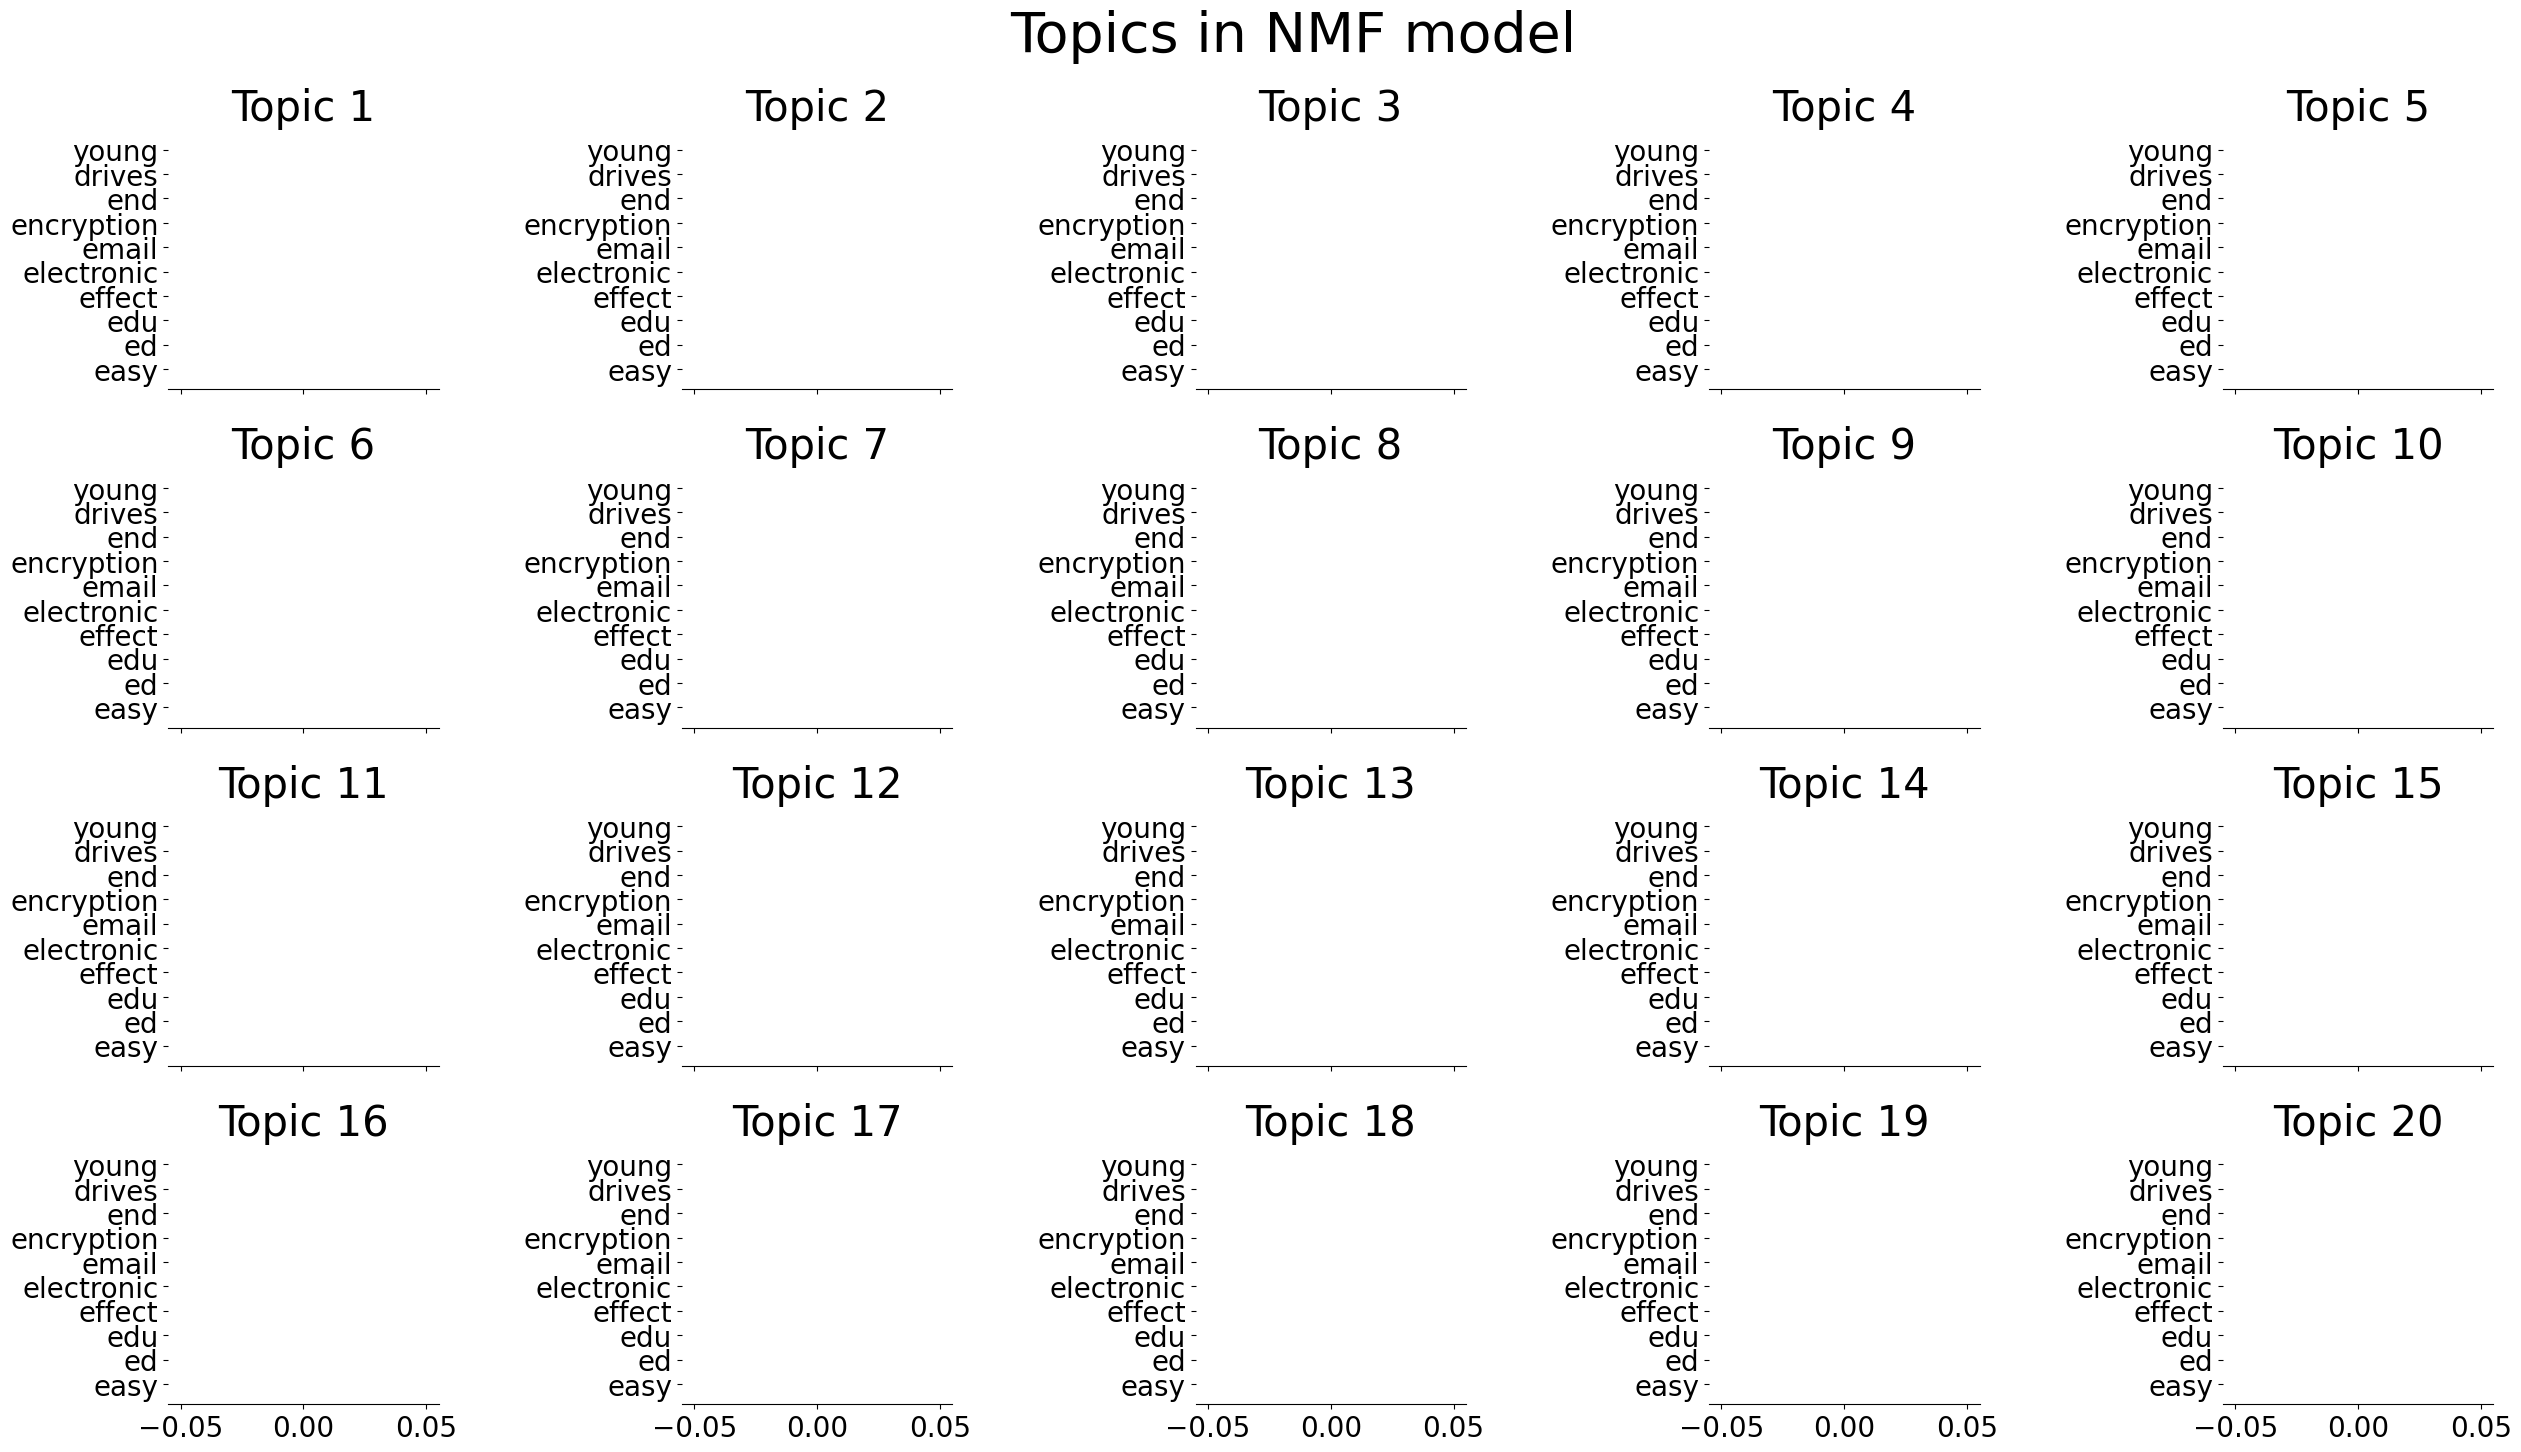

In [ ]:
n_top_words = 10
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model"
)

In [ ]:
#plot_top_words(
#    lda, tf_feature_names, n_top_words, "Topics in LDA model"
#)

In [ ]:
no_top_words = 20
print("tfidf_feature_names: ",tfidf_feature_names)
print("-------------------")
print("tf_feature_names: ",tf_feature_names)
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

tfidf_feature_names:  ['00' '000' '01' '02' '03' '04' '0d' '0t' '10' '100' '11' '12' '128' '13'
 '14' '145' '15' '16' '17' '18' '19' '1990' '1991' '1992' '1993' '1d9'
 '1st' '1t' '20' '200' '21' '22' '23' '24' '25' '250' '26' '27' '28' '29'
 '2di' '2tm' '30' '300' '31' '32' '33' '34' '34u' '35' '36' '37' '38' '39'
 '3d' '3t' '40' '42' '43' '44' '45' '50' '500' '55' '60' '64' '6ei' '70'
 '75' '75u' '7ey' '7u' '80' '800' '86' '90' '91' '92' '93' '9v' 'a86'
 'able' 'ac' 'accept' 'access' 'according' 'act' 'action' 'actually' 'add'
 'addition' 'address' 'administration' 'advance' 'age' 'ago' 'agree' 'ah'
 'air' 'al' 'algorithm' 'allow' 'allowed' 'alt' 'america' 'american'
 'analysis' 'anonymous' 'answer' 'answers' 'anti' 'anybody' 'apparently'
 'appears' 'apple' 'application' 'applications' 'appreciate' 'appreciated'
 'approach' 'appropriate' 'apr' 'april' 'archive' 'area' 'aren' 'argument'
 'armenia' 'armenian' 'armenians' 'arms' 'army' 'article' 'articles' 'ask'
 'asked' 'asking' 'assume

In [ ]:
TNG_topics_nmf = nmf.transform(tfidf)
TNG_topics_lda = lda.transform(tf)

print("dataset.target_names   ",dataset.target_names)

count_docs=[]
for i in range(20):
    count_docs.append({label: 0 for label in dataset.target_names})

for label,topic in zip(dataset.target,TNG_topics_nmf.argmax(axis=-1)):
  count_docs[topic][dataset.target_names[label]] +=1

count_docs



ValueError: ignored

In [ ]:
print(count_docs[15])

In [ ]:
neigh_lda = NearestNeighbors(n_neighbors=5, metric="cosine")
neigh_nmf = NearestNeighbors(n_neighbors=5, metric="cosine")
neigh_lda.fit(TNG_topics_lda)
neigh_nmf.fit(TNG_topics_nmf)
NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                radius=1.0)
idx = 17
print(TNG_topics_lda[idx:idx+1])
p= neigh_nmf.kneighbors(TNG_topics_lda[idx:idx+1])
print(p[1])



In [ ]:
print("El ",idx," : ",dataset.data[idx])



In [ ]:
i=0
for simis in p[1][0]:
  i=i+1
  print(simis)
  print("Opcion similar ",i,")", simis,": ",dataset.data[simis], "\n", "\n")

## Matriz termino-termino


In [ ]:
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(documents)
sequences = tokenizer.texts_to_sequences(documents)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
window_size = 3  # Ajusta el tamaño de la ventana de contexto

sampling_table = sequence.make_sampling_table(vocab_size)
couples, labels = skipgrams(sequence, vocab_size, window_size=window_size, sampling_table=sampling_table)


In [ ]:
target_word_indices, context_word_indices = zip(*couples)
target_word_indices = list(target_word_indices)
context_word_indices = list(context_word_indices)

rows = target_word_indices
cols = context_word_indices

term_term_matrix = sparse.csr_matrix((labels, (rows, cols)), shape=(vocab_size, vocab_size))


sesgo del modelo